# Provocare: Analiza textului despre Știința Datelor

În acest exemplu, vom face un exercițiu simplu care acoperă toate etapele unui proces tradițional de știința datelor. Nu trebuie să scrii niciun cod, poți doar să dai clic pe celulele de mai jos pentru a le executa și a observa rezultatul. Ca provocare, ești încurajat să încerci acest cod cu date diferite.

## Scop

În această lecție, am discutat diferite concepte legate de Știința Datelor. Haideți să încercăm să descoperim mai multe concepte conexe prin **analiza textului**. Vom începe cu un text despre Știința Datelor, vom extrage cuvinte-cheie din acesta și apoi vom încerca să vizualizăm rezultatul.

Ca text, voi folosi pagina despre Știința Datelor de pe Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Pasul 1: Obținerea datelor

Primul pas în orice proces de știința datelor este obținerea datelor. Vom folosi biblioteca `requests` pentru a face acest lucru:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Pasul 2: Transformarea datelor

Următorul pas este să convertim datele într-o formă potrivită pentru procesare. În cazul nostru, am descărcat codul sursă HTML de pe pagină și trebuie să-l transformăm în text simplu.

Există multe moduri prin care acest lucru poate fi realizat. Vom folosi cel mai simplu obiect [HTMLParser](https://docs.python.org/3/library/html.parser.html) integrat din Python. Trebuie să extindem clasa `HTMLParser` și să definim codul care va colecta tot textul din interiorul etichetelor HTML, cu excepția etichetelor `<script>` și `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Pasul 3: Obținerea de informații

Cel mai important pas este să transformăm datele noastre într-o formă din care să putem extrage informații utile. În cazul nostru, dorim să extragem cuvinte cheie din text și să vedem care dintre acestea sunt mai semnificative.

Vom folosi o bibliotecă Python numită [RAKE](https://github.com/aneesha/RAKE) pentru extragerea cuvintelor cheie. Mai întâi, să instalăm această bibliotecă dacă nu este deja prezentă:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Funcționalitatea principală este disponibilă prin obiectul `Rake`, pe care îl putem personaliza folosind câțiva parametri. În cazul nostru, vom seta lungimea minimă a unui cuvânt cheie la 5 caractere, frecvența minimă a unui cuvânt cheie în document la 3 și numărul maxim de cuvinte dintr-un cuvânt cheie la 2. Simțiți-vă liber să experimentați cu alte valori și să observați rezultatul.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Am obținut o listă de termeni împreună cu gradul lor de importanță asociat. După cum puteți vedea, cele mai relevante discipline, cum ar fi machine learning și big data, sunt prezente în listă pe pozițiile de top.

## Pasul 4: Vizualizarea Rezultatelor

Oamenii interpretează cel mai bine datele în formă vizuală. Astfel, deseori are sens să vizualizăm datele pentru a obține anumite perspective. Putem folosi biblioteca `matplotlib` din Python pentru a reprezenta grafic distribuția simplă a cuvintelor cheie împreună cu relevanța lor:


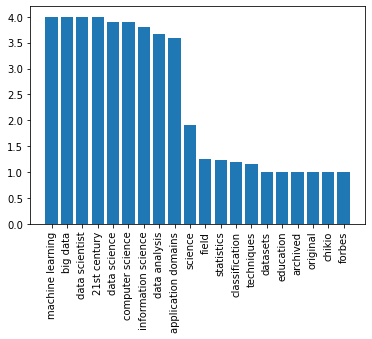

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Există, totuși, o modalitate și mai bună de a vizualiza frecvențele cuvintelor - folosind **Word Cloud**. Va trebui să instalăm o altă bibliotecă pentru a crea un word cloud din lista noastră de cuvinte cheie.


In [71]:
!{sys.executable} -m pip install wordcloud

Obiectul `WordCloud` este responsabil pentru preluarea fie a textului original, fie a unei liste pre-calculate de cuvinte cu frecvențele lor, și returnează o imagine, care poate fi apoi afișată folosind `matplotlib`:


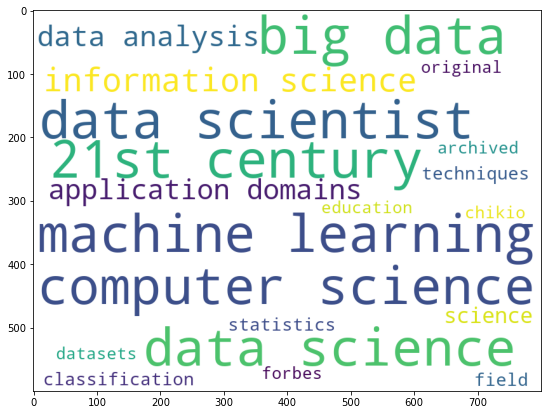

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Putem, de asemenea, să introducem textul original în `WordCloud` - să vedem dacă putem obține un rezultat similar:


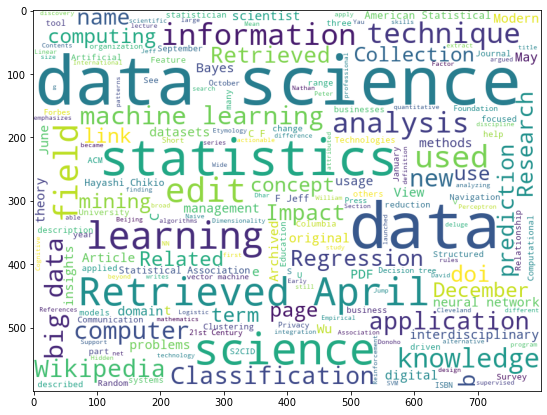

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Puteți observa că norul de cuvinte arată acum mai impresionant, dar conține și mult zgomot (de exemplu, cuvinte fără legătură precum `Retrieved on`). De asemenea, obținem mai puține cuvinte-cheie formate din două cuvinte, cum ar fi *data scientist* sau *computer science*. Acest lucru se întâmplă deoarece algoritmul RAKE face o treabă mult mai bună în selectarea cuvintelor-cheie relevante din text. Acest exemplu ilustrează importanța pre-procesării și curățării datelor, deoarece o imagine clară la final ne va permite să luăm decizii mai bune.

În acest exercițiu am parcurs un proces simplu de extragere a unor semnificații dintr-un text de pe Wikipedia, sub forma cuvintelor-cheie și a unui nor de cuvinte. Acest exemplu este destul de simplu, dar demonstrează bine toate etapele tipice pe care un data scientist le parcurge atunci când lucrează cu date, începând de la achiziția datelor până la vizualizare.

În cadrul cursului nostru vom discuta toate aceste etape în detaliu.



---

**Declinarea responsabilității**:  
Acest document a fost tradus folosind serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să rețineți că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist uman. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
